# Exploratory Data Analysis with Visualization 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
falcon9_df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
falcon9_df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


### Relationship between Flight Number and Payload Mass

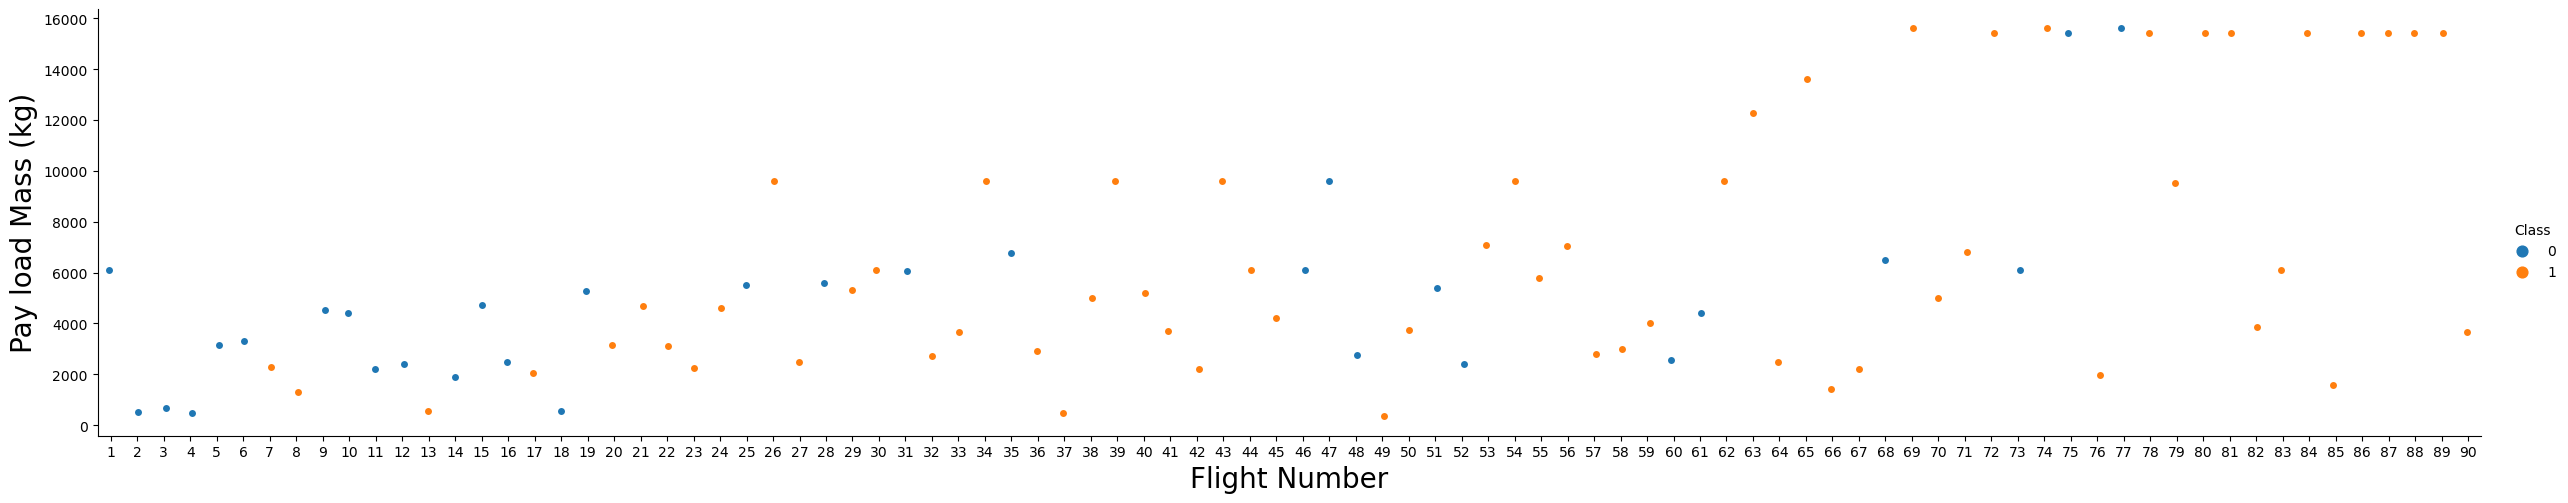

In [7]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=falcon9_df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Plotting the Flight Number vs. Payload Mass and overlaying the outcome of the launch, we see that as the flight number increases, the first stage is more likely to land successfully. Considering payload mass, it seems the more massive the payload, the more likely the first stage will return.

### Relationship between Flight Number and Launch Site


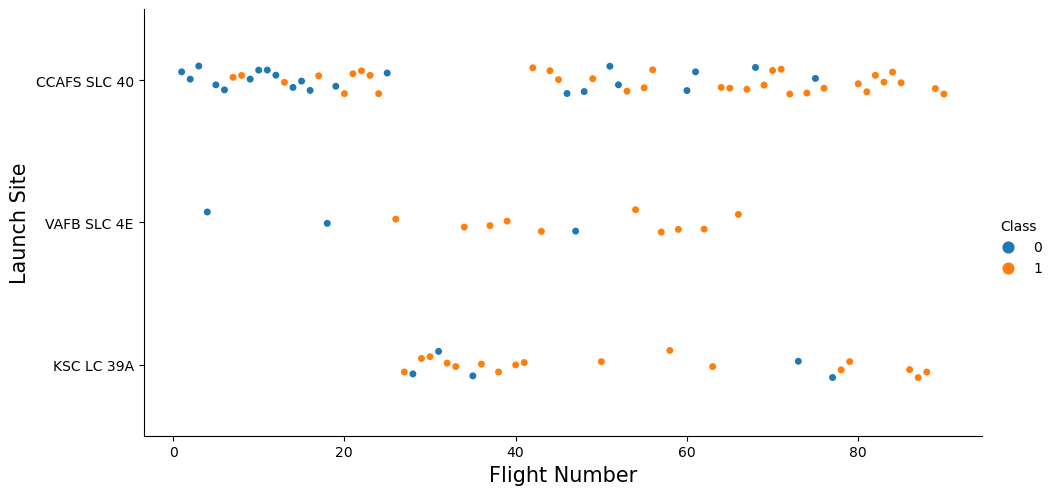

In [14]:
sns.catplot(y="LaunchSite",x="FlightNumber",hue="Class",data=falcon9_df,aspect=2)
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Launch Site", fontsize=15)
plt.show()

From this graph we can see that as flight numbers increased, the landings became relatively more successful for each launch site. However, the CCAFS SLC 40 site experienced a greater number of unsuccessful landings as it seems to have been the main launch site for the first 20 or so flights

### Relationship between Payload and Launch Site


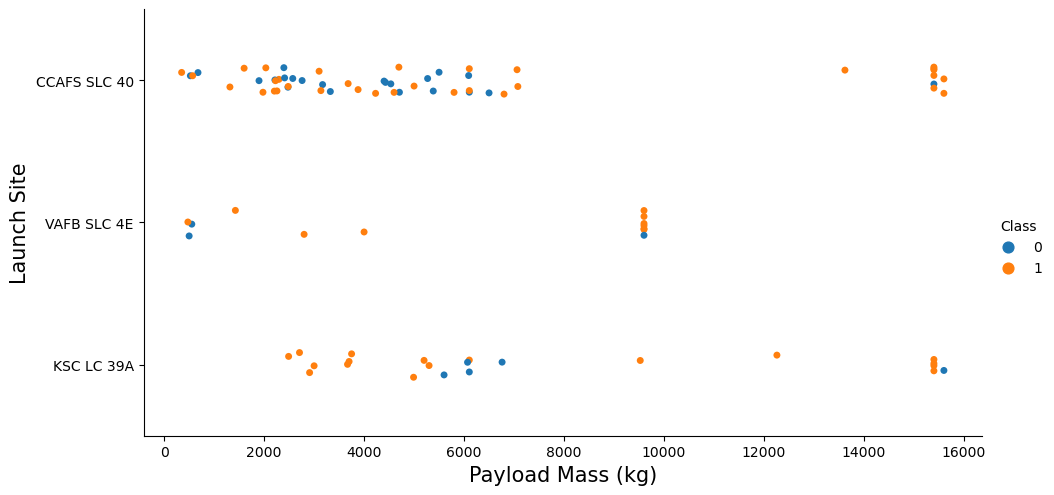

In [16]:
sns.catplot(x="PayloadMass",y="LaunchSite",hue="Class",data=falcon9_df,aspect=2)
plt.xlabel("Payload Mass (kg)",fontsize=15)
plt.ylabel("Launch Site",fontsize=15)
plt.show()

If we observe Payload Mass Vs. Launch Site, we see the same result from the first graph which is that a greater payload mass is related to more successful landings. We additionally see that for the VAFB-SLC  launchsite, there are no rockets launched with a payload mass greater than 10000.


### Relationship between success rate of each orbit type


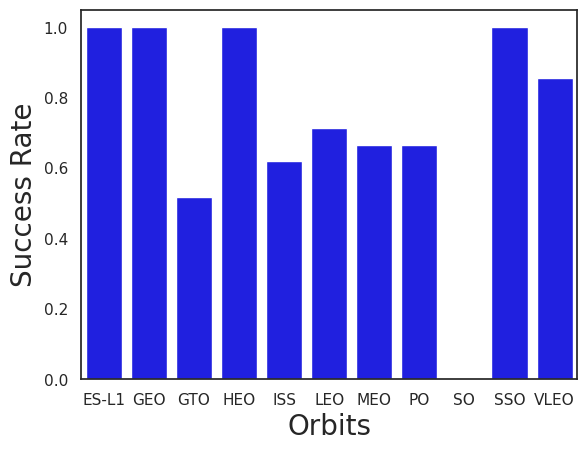

In [29]:
orbit=falcon9_df.groupby(['Orbit']).agg(success=("Class", 'mean'))
orbit=orbit.reset_index()
sns.barplot(x="Orbit",y="success",data=orbit,color='blue')
plt.xlabel("Orbits",fontsize=20)
plt.ylabel("Success Rate",fontsize=20)
plt.show()

We can see that the rockets that launched to the ES-L1, GEO, HEO, and SSO orbits were successful every time. On the other hand, the rockets that launched to the GTO orbit had the lowest success rate, while those targeted for the SO orbit were always unsuccessful

### Relationship between FlightNumber and Orbit type


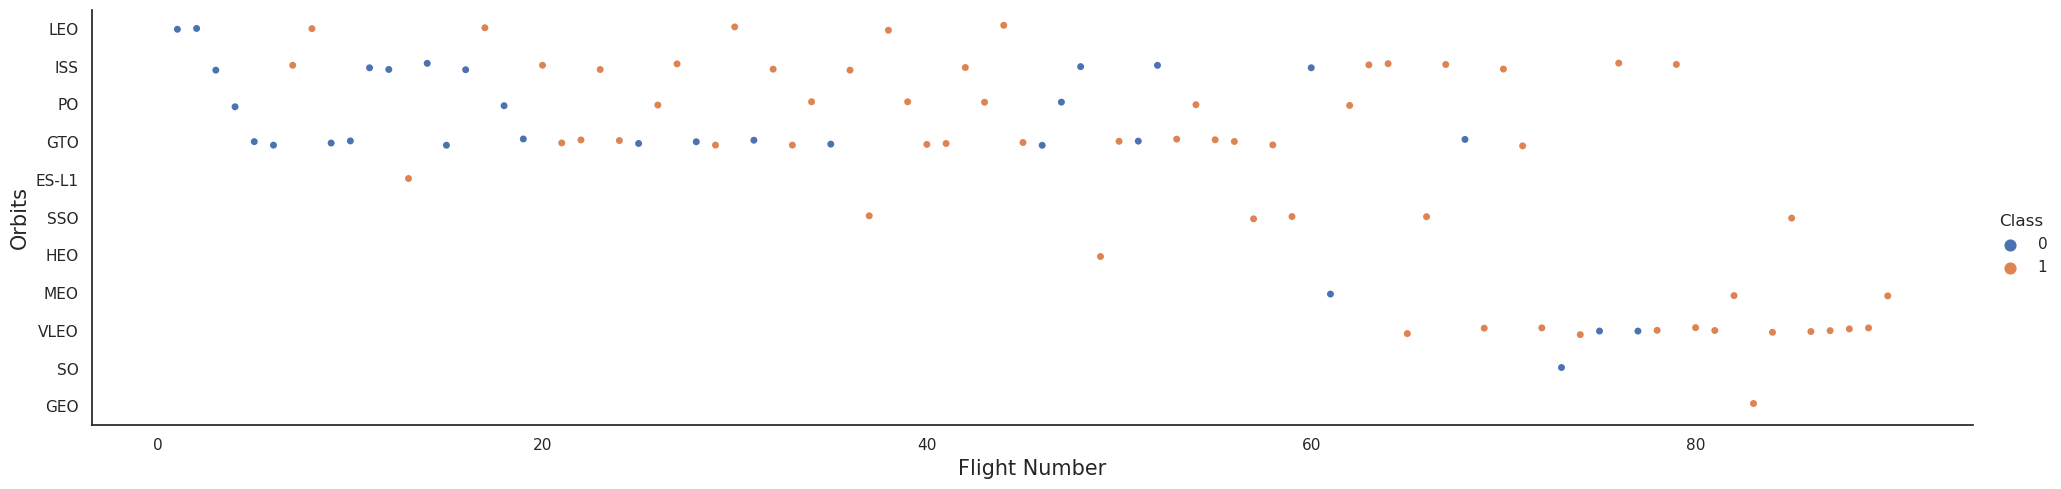

In [30]:
sns.catplot(x="FlightNumber",y="Orbit",data=falcon9_df,hue="Class",aspect=4)
plt.xlabel("Flight Number",fontsize=15)
plt.ylabel("Orbits",fontsize=15)
plt.show()

We can see that in the LEO orbit successful landings appear related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit


### Relationship between Payload and Orbit type


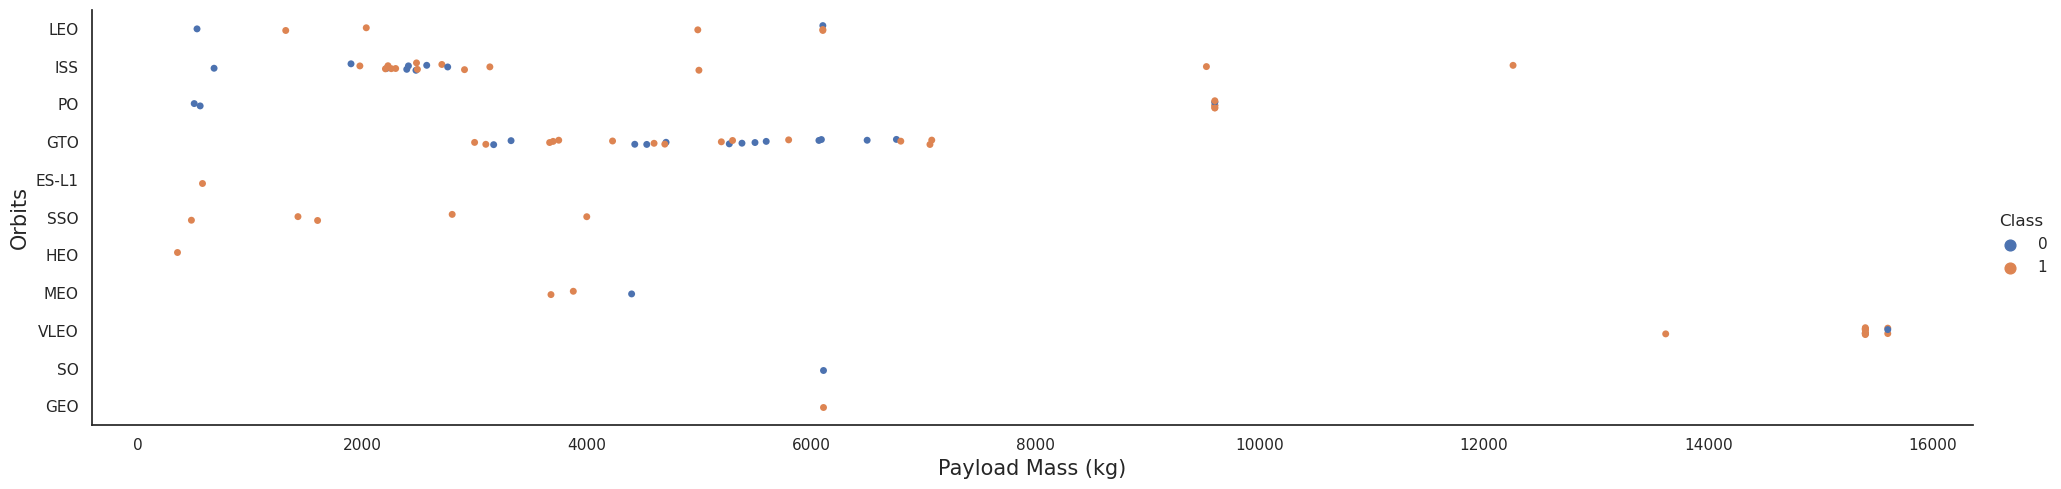

In [31]:
sns.catplot(x="PayloadMass",y="Orbit",data=falcon9_df,hue="Class",aspect=4)
plt.xlabel("Payload Mass (kg)",fontsize=15)
plt.ylabel("Orbits",fontsize=15)
plt.show()

From this graph we see that rockets with heavier payloads were successful in the PO, VLEO and ISS orbits. Rockets with lighter payloads were successful in the ES-L1, SSO, and HEO orbits but relatively unsuccessful in the LEO, ISS, and PO orbits.


### Yearly Launch Success Trend


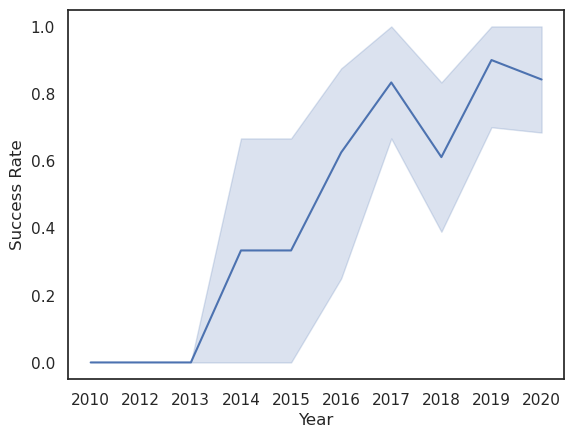

In [52]:
year=[]
def Extract_year(date):
    for i in falcon9_df["Date"]:
        year.append(i.split("-")[0])
    return year
year=Extract_year("Date") 
sns.lineplot(x=year,y="Class",data=falcon9_df)
plt.xlabel("Year")
plt.ylabel("Success Rate")
plt.show()

We can observe that the success rate has been increasing since 2013 with a small dip in 2018


## Features Engineering


We will now select the features that will be used in success prediction in the future module

In [53]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### Creating dummy variables to categorical columns


In [58]:
features_one_hot=pd.get_dummies(features,columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Casting all numeric columns to `float64`


In [59]:
features_one_hot.astype('float')

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,87.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,88.0,15400.000000,6.0,1.0,1.0,1.0,5.0,5.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,89.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>
